In [1]:
import joblib
import gzip
import pandas
import pickle
import seaborn
import tqdm

from lib.models.generic_v0.model import map_params

In [2]:
import sys

util_dir = "./sprint-0-explicit-mdps/"
sys.path.append(util_dir)

import util

In [3]:
mdps = pandas.read_pickle("5-generated-mdps/fixed.pkl.gz")
mdps

,problem,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,dag_size_limit,size,time_spent,rss,mdp
0,ref-fc16,fc16sapirshtein,True,True,True,True,True,bitcoin,6,47,0.001526,0.173733,796f1493
1,ref-aft20,aft20barzur,True,True,True,True,True,bitcoin,6,37,0.000878,0.174343,4af662cd
2,v1,generic-v1,False,False,True,True,True,bitcoin,6,21327,14.501364,0.339870,b0bcebe3
3,v1,generic-v1,False,False,True,True,True,ethereum_3,6,32961,22.658303,0.438072,1ec9e0cf
4,v1,generic-v1,False,False,True,True,True,byzantium_3,6,33016,25.014239,0.438927,3efc54de
5,v1,generic-v1,False,False,True,True,True,ghostdag_3,6,46966,40.091348,0.537491,7ff99c88
6,v1,generic-v1,False,False,True,True,True,parallel_3,6,9122,6.108848,0.275288,31f9737e
7,v1+fc,generic-v1,True,False,True,True,True,bitcoin,6,549,0.258839,0.230808,cb180504
8,v1+fc,generic-v1,True,False,True,True,True,ethereum_3,6,1179,0.723068,0.236877,79fa3543
9,v1+fc,generic-v1,True,False,True,True,True,byzantium_3,6,1109,0.749300,0.243916,1306d62b


In [4]:
networks = []
# for alpha in range(35, 41, 5):
for alpha in range(5, 51, 5):
    for gamma in [0.33, 0.66]:
        # for gamma in [0, 0.5, 1]:
        networks.append(dict(alpha=alpha / 100, gamma=gamma))
# pandas.DataFrame(networks)

In [5]:
horizon = 100
stop_delta = (
    0.0001  # value iteration stops when no value estimate changes more than this value
)

In [6]:
def optimize(network, idx, row):
    with gzip.open(f"5-generated-mdps/mdp-{row.mdp}.pkl.gz", "rb") as f:
        emdp = pickle.load(f)
        emdp = map_params(emdp, **network)
        oae = util.optimize_and_evaluate(emdp, eps=stop_delta, horizon=horizon)
        return row.to_dict() | dict(horizon=horizon) | network | oae


def generate_jobs():
    for network in networks:
        for idx, row in mdps.iterrows():
            # if row['size'] > 1000:
            #    continue
            yield joblib.delayed(optimize)(network, idx, row)


jobs = list(generate_jobs())
generate_solutions = joblib.Parallel(return_as="generator_unordered", n_jobs=6)(jobs)
with_progress = tqdm.tqdm(generate_solutions, total=len(jobs))
df = pandas.DataFrame(with_progress)
df.to_pickle("5-value-iterations.pkl.gz")
df

  0%|                                                                                             | 0/480 [00:00<?, ?it/s]

  0%|▏                                                                                    | 1/480 [00:00<05:49,  1.37it/s]

  1%|▌                                                                                    | 3/480 [00:03<09:38,  1.21s/it]

  1%|▋                                                                                    | 4/480 [00:10<26:01,  3.28s/it]

  1%|▉                                                                                    | 5/480 [00:16<32:19,  4.08s/it]

  1%|█                                                                                    | 6/480 [00:24<42:01,  5.32s/it]

  1%|█▏                                                                                 | 7/480 [00:37<1:00:21,  7.66s/it]

  2%|█▍                                                                                 | 8/480 [00:53<1:21:23, 10.35s/it]

  2%|█▌                                                                                 | 9/480 [01:15<1:48:55, 13.88s/it]

  2%|█▋                                                                                | 10/480 [01:49<2:36:13, 19.94s/it]

  2%|█▉                                                                                | 11/480 [02:10<2:40:36, 20.55s/it]

  2%|██                                                                                | 12/480 [02:15<2:03:32, 15.84s/it]

  3%|██▏                                                                               | 13/480 [02:17<1:30:18, 11.60s/it]

  3%|██▍                                                                               | 14/480 [02:20<1:10:29,  9.08s/it]

  3%|██▋                                                                                 | 15/480 [02:21<49:25,  6.38s/it]

  3%|██▊                                                                                 | 16/480 [02:24<41:25,  5.36s/it]

  4%|██▉                                                                                 | 17/480 [02:24<29:26,  3.82s/it]

  4%|███▏                                                                                | 18/480 [02:27<28:31,  3.71s/it]

  4%|███▎                                                                                | 19/480 [02:29<24:11,  3.15s/it]

  4%|███▌                                                                                | 20/480 [02:29<17:31,  2.29s/it]

  4%|███▋                                                                                | 21/480 [02:30<12:50,  1.68s/it]

  5%|███▊                                                                                | 22/480 [02:47<49:41,  6.51s/it]

  5%|████                                                                                | 23/480 [02:56<55:00,  7.22s/it]

  5%|████▏                                                                               | 24/480 [03:04<56:20,  7.41s/it]

  5%|████▎                                                                             | 25/480 [03:31<1:41:35, 13.40s/it]

  5%|████▍                                                                             | 26/480 [04:26<3:14:53, 25.76s/it]

  6%|████▌                                                                             | 27/480 [04:29<2:22:50, 18.92s/it]

  6%|████▊                                                                             | 28/480 [04:35<1:53:09, 15.02s/it]

  6%|████▉                                                                             | 29/480 [04:40<1:31:05, 12.12s/it]

  6%|█████▏                                                                            | 30/480 [04:48<1:21:12, 10.83s/it]

  6%|█████▎                                                                            | 31/480 [04:58<1:18:08, 10.44s/it]

  7%|█████▌                                                                              | 32/480 [04:59<58:22,  7.82s/it]

  7%|█████▋                                                                            | 33/480 [05:37<2:05:32, 16.85s/it]

  7%|█████▊                                                                            | 34/480 [05:53<2:02:09, 16.43s/it]

  7%|█████▉                                                                            | 35/480 [05:53<1:26:44, 11.70s/it]

  8%|██████▏                                                                           | 36/480 [05:56<1:07:23,  9.11s/it]

  8%|██████▍                                                                             | 37/480 [05:58<50:56,  6.90s/it]

  8%|██████▋                                                                             | 38/480 [06:01<42:39,  5.79s/it]

  8%|██████▊                                                                             | 39/480 [06:04<34:23,  4.68s/it]

  8%|███████                                                                             | 40/480 [06:04<25:46,  3.51s/it]

  9%|███████▏                                                                            | 41/480 [06:06<22:39,  3.10s/it]

  9%|███████▎                                                                            | 42/480 [06:07<17:15,  2.37s/it]

  9%|███████▌                                                                            | 43/480 [06:10<18:59,  2.61s/it]

  9%|███████▋                                                                            | 44/480 [06:11<13:51,  1.91s/it]

  9%|███████▉                                                                            | 45/480 [06:11<10:13,  1.41s/it]

 10%|████████                                                                            | 46/480 [06:31<51:19,  7.10s/it]

 10%|████████▏                                                                           | 47/480 [06:36<46:37,  6.46s/it]

 10%|████████▏                                                                         | 48/480 [06:52<1:06:13,  9.20s/it]

 10%|████████▎                                                                         | 49/480 [08:51<5:03:54, 42.31s/it]

 10%|████████▌                                                                         | 50/480 [09:57<5:53:02, 49.26s/it]

 11%|████████▋                                                                         | 51/480 [09:58<4:08:13, 34.72s/it]

 11%|████████▉                                                                         | 52/480 [10:00<2:58:49, 25.07s/it]

 11%|█████████                                                                         | 53/480 [10:05<2:16:03, 19.12s/it]

 11%|█████████▏                                                                        | 54/480 [10:06<1:37:08, 13.68s/it]

 11%|█████████▍                                                                        | 55/480 [10:14<1:23:38, 11.81s/it]

 12%|█████████▌                                                                        | 56/480 [10:20<1:10:39, 10.00s/it]

 12%|█████████▋                                                                        | 57/480 [10:28<1:08:03,  9.65s/it]

 12%|█████████▉                                                                        | 58/480 [10:37<1:05:55,  9.37s/it]

 12%|██████████                                                                        | 59/480 [10:52<1:18:15, 11.15s/it]

 12%|██████████▎                                                                       | 60/480 [10:57<1:03:59,  9.14s/it]

 13%|██████████▋                                                                         | 61/480 [10:59<48:57,  7.01s/it]

 13%|██████████▊                                                                         | 62/480 [11:03<41:48,  6.00s/it]

 13%|███████████                                                                         | 63/480 [11:04<32:47,  4.72s/it]

 13%|███████████▏                                                                        | 64/480 [11:06<25:58,  3.75s/it]

 14%|███████████▍                                                                        | 65/480 [11:08<21:46,  3.15s/it]

 14%|███████████▌                                                                        | 66/480 [11:09<18:17,  2.65s/it]

 14%|███████████▋                                                                        | 67/480 [11:12<18:39,  2.71s/it]

 14%|███████████▉                                                                        | 68/480 [11:12<13:36,  1.98s/it]

 14%|████████████                                                                        | 69/480 [11:12<10:04,  1.47s/it]

 15%|████████████▎                                                                       | 70/480 [11:28<39:21,  5.76s/it]

 15%|████████████▍                                                                       | 71/480 [11:29<29:32,  4.33s/it]

 15%|████████████▌                                                                       | 72/480 [11:45<53:09,  7.82s/it]

 15%|████████████▍                                                                     | 73/480 [13:48<4:47:03, 42.32s/it]

 15%|████████████▋                                                                     | 74/480 [14:23<4:31:57, 40.19s/it]

 16%|████████████▊                                                                     | 75/480 [14:27<3:17:52, 29.31s/it]

 16%|████████████▉                                                                     | 76/480 [14:34<2:32:09, 22.60s/it]

 16%|█████████████▏                                                                    | 77/480 [14:40<1:58:55, 17.71s/it]

 16%|█████████████▎                                                                    | 78/480 [14:49<1:40:30, 15.00s/it]

 16%|█████████████▍                                                                    | 79/480 [14:51<1:13:42, 11.03s/it]

 17%|█████████████▋                                                                    | 80/480 [15:02<1:13:18, 11.00s/it]

 17%|██████████████▏                                                                     | 81/480 [15:03<54:21,  8.17s/it]

 17%|██████████████▎                                                                     | 82/480 [15:13<57:16,  8.63s/it]

 17%|██████████████▏                                                                   | 83/480 [15:33<1:19:56, 12.08s/it]

 18%|██████████████▎                                                                   | 84/480 [15:44<1:17:49, 11.79s/it]

 18%|██████████████▉                                                                     | 85/480 [15:45<56:07,  8.52s/it]

 18%|███████████████                                                                     | 86/480 [15:46<41:18,  6.29s/it]

 18%|███████████████▏                                                                    | 87/480 [15:49<34:17,  5.24s/it]

 18%|███████████████▍                                                                    | 88/480 [15:50<25:09,  3.85s/it]

 19%|███████████████▌                                                                    | 89/480 [15:53<23:50,  3.66s/it]

 19%|███████████████▊                                                                    | 90/480 [15:53<17:07,  2.63s/it]

 19%|███████████████▉                                                                    | 91/480 [15:57<20:08,  3.11s/it]

 19%|████████████████                                                                    | 92/480 [15:58<14:35,  2.26s/it]

 19%|████████████████▎                                                                   | 93/480 [15:58<10:41,  1.66s/it]

 20%|████████████████▍                                                                   | 94/480 [16:06<23:03,  3.58s/it]

 20%|████████████████▋                                                                   | 95/480 [16:12<28:27,  4.44s/it]

 20%|████████████████▊                                                                   | 96/480 [16:21<36:55,  5.77s/it]

 20%|████████████████▌                                                                 | 97/480 [18:49<5:09:32, 48.49s/it]

 20%|████████████████▋                                                                 | 98/480 [19:53<5:38:13, 53.12s/it]

 21%|████████████████▉                                                                 | 99/480 [19:57<4:02:45, 38.23s/it]

 21%|████████████████▉                                                                | 100/480 [20:00<2:55:02, 27.64s/it]

 21%|█████████████████                                                                | 101/480 [20:05<2:12:59, 21.05s/it]

 21%|█████████████████▏                                                               | 102/480 [20:07<1:36:03, 15.25s/it]

 21%|█████████████████▍                                                               | 103/480 [20:14<1:19:44, 12.69s/it]

 22%|█████████████████▌                                                               | 104/480 [20:21<1:08:43, 10.97s/it]

 22%|█████████████████▋                                                               | 105/480 [20:35<1:15:33, 12.09s/it]

 22%|██████████████████▎                                                                | 106/480 [20:38<57:11,  9.18s/it]

 22%|██████████████████▌                                                                | 107/480 [20:46<55:35,  8.94s/it]

 22%|██████████████████▏                                                              | 108/480 [21:00<1:05:03, 10.49s/it]

 23%|██████████████████▊                                                                | 109/480 [21:01<46:53,  7.58s/it]

 23%|███████████████████                                                                | 110/480 [21:02<35:06,  5.69s/it]

 23%|███████████████████▏                                                               | 111/480 [21:05<29:43,  4.83s/it]

 23%|███████████████████▎                                                               | 112/480 [21:06<21:42,  3.54s/it]

 24%|███████████████████▌                                                               | 113/480 [21:09<20:45,  3.39s/it]

 24%|███████████████████▋                                                               | 114/480 [21:09<15:37,  2.56s/it]

 24%|███████████████████▉                                                               | 115/480 [21:14<19:31,  3.21s/it]

 24%|████████████████████                                                               | 116/480 [21:15<14:14,  2.35s/it]

 24%|████████████████████▏                                                              | 117/480 [21:15<10:31,  1.74s/it]

 25%|████████████████████▍                                                              | 118/480 [21:40<52:09,  8.64s/it]

 25%|████████████████████▌                                                              | 119/480 [21:41<38:57,  6.47s/it]

 25%|████████████████████▊                                                              | 120/480 [21:54<51:05,  8.51s/it]

 25%|████████████████████▍                                                            | 121/480 [24:06<4:31:53, 45.44s/it]

 25%|████████████████████▌                                                            | 122/480 [25:09<5:02:58, 50.78s/it]

 26%|████████████████████▊                                                            | 123/480 [25:12<3:37:29, 36.55s/it]

 26%|████████████████████▉                                                            | 124/480 [25:18<2:42:28, 27.38s/it]

 26%|█████████████████████                                                            | 125/480 [25:20<1:56:16, 19.65s/it]

 26%|█████████████████████▎                                                           | 126/480 [25:21<1:21:57, 13.89s/it]

 26%|█████████████████████▍                                                           | 127/480 [25:25<1:05:12, 11.08s/it]

 27%|██████████████████████▏                                                            | 128/480 [25:30<53:33,  9.13s/it]

 27%|██████████████████████▎                                                            | 129/480 [25:35<47:33,  8.13s/it]

 27%|█████████████████████▉                                                           | 130/480 [25:55<1:07:28, 11.57s/it]

 27%|██████████████████████                                                           | 131/480 [26:12<1:16:36, 13.17s/it]

 28%|██████████████████████▎                                                          | 132/480 [26:25<1:16:41, 13.22s/it]

 28%|██████████████████████▉                                                            | 133/480 [26:27<57:10,  9.89s/it]

 28%|███████████████████████▏                                                           | 134/480 [26:31<46:56,  8.14s/it]

 28%|███████████████████████▎                                                           | 135/480 [26:35<39:21,  6.85s/it]

 28%|███████████████████████▌                                                           | 136/480 [26:38<32:07,  5.60s/it]

 29%|███████████████████████▋                                                           | 137/480 [26:39<24:11,  4.23s/it]

 29%|███████████████████████▊                                                           | 138/480 [26:41<20:58,  3.68s/it]

 29%|████████████████████████                                                           | 139/480 [26:42<15:28,  2.72s/it]

 29%|████████████████████████▏                                                          | 140/480 [26:42<11:20,  2.00s/it]

 29%|████████████████████████▍                                                          | 141/480 [26:42<08:25,  1.49s/it]

 30%|████████████████████████▌                                                          | 142/480 [26:44<07:47,  1.38s/it]

 30%|████████████████████████▋                                                          | 143/480 [26:47<11:02,  1.97s/it]

 30%|████████████████████████▉                                                          | 144/480 [27:09<45:21,  8.10s/it]

 30%|████████████████████████▍                                                        | 145/480 [29:58<5:14:31, 56.33s/it]

 30%|████████████████████████▋                                                        | 146/480 [30:36<4:42:08, 50.68s/it]

 31%|████████████████████████▊                                                        | 147/480 [30:39<3:22:44, 36.53s/it]

 31%|████████████████████████▉                                                        | 148/480 [30:48<2:35:41, 28.14s/it]

 31%|█████████████████████████▏                                                       | 149/480 [30:55<2:00:00, 21.75s/it]

 31%|█████████████████████████▎                                                       | 150/480 [31:03<1:37:24, 17.71s/it]

 31%|█████████████████████████▍                                                       | 151/480 [31:17<1:31:06, 16.62s/it]

 32%|█████████████████████████▋                                                       | 152/480 [31:18<1:05:29, 11.98s/it]

 32%|██████████████████████████▍                                                        | 153/480 [31:22<52:13,  9.58s/it]

 32%|█████████████████████████▉                                                       | 154/480 [31:37<1:01:22, 11.29s/it]

 32%|██████████████████████████▏                                                      | 155/480 [31:55<1:12:05, 13.31s/it]

 32%|██████████████████████████▎                                                      | 156/480 [32:07<1:08:23, 12.67s/it]

 33%|███████████████████████████▏                                                       | 157/480 [32:09<51:10,  9.51s/it]

 33%|███████████████████████████▎                                                       | 158/480 [32:10<38:01,  7.08s/it]

 33%|███████████████████████████▍                                                       | 159/480 [32:13<31:16,  5.84s/it]

 33%|███████████████████████████▋                                                       | 160/480 [32:14<22:42,  4.26s/it]

 34%|███████████████████████████▊                                                       | 161/480 [32:17<21:08,  3.98s/it]

 34%|████████████████████████████                                                       | 162/480 [32:18<16:02,  3.03s/it]

 34%|████████████████████████████▏                                                      | 163/480 [32:23<18:43,  3.54s/it]

 34%|████████████████████████████▎                                                      | 164/480 [32:23<13:33,  2.58s/it]

 34%|████████████████████████████▌                                                      | 165/480 [32:23<09:53,  1.88s/it]

 35%|████████████████████████████▋                                                      | 166/480 [32:35<25:57,  4.96s/it]

 35%|████████████████████████████▉                                                      | 167/480 [32:45<33:48,  6.48s/it]

 35%|█████████████████████████████                                                      | 168/480 [32:57<41:37,  8.00s/it]

 35%|████████████████████████████▌                                                    | 169/480 [35:26<4:20:49, 50.32s/it]

 35%|████████████████████████████▋                                                    | 170/480 [36:44<5:03:21, 58.71s/it]

 36%|████████████████████████████▊                                                    | 171/480 [36:48<3:37:19, 42.20s/it]

 36%|█████████████████████████████                                                    | 172/480 [36:54<2:41:02, 31.37s/it]

 36%|█████████████████████████████▏                                                   | 173/480 [36:57<1:56:46, 22.82s/it]

 36%|█████████████████████████████▎                                                   | 174/480 [36:59<1:24:16, 16.52s/it]

 36%|█████████████████████████████▌                                                   | 175/480 [37:01<1:02:51, 12.37s/it]

 37%|██████████████████████████████▍                                                    | 176/480 [37:06<50:38, 10.00s/it]

 37%|██████████████████████████████▌                                                    | 177/480 [37:14<47:19,  9.37s/it]

 37%|██████████████████████████████                                                   | 178/480 [37:41<1:14:42, 14.84s/it]

 37%|██████████████████████████████▉                                                    | 179/480 [37:45<58:03, 11.57s/it]

 38%|███████████████████████████████▏                                                   | 180/480 [37:50<47:00,  9.40s/it]

 38%|███████████████████████████████▎                                                   | 181/480 [37:52<35:56,  7.21s/it]

 38%|███████████████████████████████▍                                                   | 182/480 [37:56<31:33,  6.36s/it]

 38%|███████████████████████████████▋                                                   | 183/480 [38:00<27:25,  5.54s/it]

 38%|███████████████████████████████▊                                                   | 184/480 [38:00<19:49,  4.02s/it]

 39%|███████████████████████████████▉                                                   | 185/480 [38:03<18:37,  3.79s/it]

 39%|████████████████████████████████▏                                                  | 186/480 [38:04<14:26,  2.95s/it]

 39%|████████████████████████████████▎                                                  | 187/480 [38:09<17:01,  3.49s/it]

 39%|████████████████████████████████▌                                                  | 188/480 [38:09<12:19,  2.53s/it]

 39%|████████████████████████████████▋                                                  | 189/480 [38:10<08:59,  1.85s/it]

 40%|████████████████████████████████▊                                                  | 190/480 [38:29<34:09,  7.07s/it]

 40%|█████████████████████████████████                                                  | 191/480 [38:35<33:08,  6.88s/it]

 40%|████████████████████████████████▍                                                | 192/480 [39:05<1:05:45, 13.70s/it]

 40%|████████████████████████████████▌                                                | 193/480 [41:19<3:58:38, 49.89s/it]

 40%|████████████████████████████████▋                                                | 194/480 [42:41<4:43:48, 59.54s/it]

 41%|████████████████████████████████▉                                                | 195/480 [42:42<3:19:23, 41.98s/it]

 41%|█████████████████████████████████                                                | 196/480 [42:46<2:23:57, 30.41s/it]

 41%|█████████████████████████████████▏                                               | 197/480 [42:51<1:47:58, 22.89s/it]

 41%|█████████████████████████████████▍                                               | 198/480 [42:52<1:17:00, 16.38s/it]

 41%|█████████████████████████████████▌                                               | 199/480 [43:00<1:04:22, 13.75s/it]

 42%|██████████████████████████████████▌                                                | 200/480 [43:07<54:26, 11.67s/it]

 42%|██████████████████████████████████▊                                                | 201/480 [43:09<40:27,  8.70s/it]

 42%|██████████████████████████████████                                               | 202/480 [43:50<1:25:35, 18.47s/it]

 42%|██████████████████████████████████▎                                              | 203/480 [44:06<1:22:12, 17.81s/it]

 42%|██████████████████████████████████▍                                              | 204/480 [44:22<1:19:05, 17.19s/it]

 43%|███████████████████████████████████▍                                               | 205/480 [44:23<56:45, 12.38s/it]

 43%|███████████████████████████████████▌                                               | 206/480 [44:24<40:58,  8.97s/it]

 43%|███████████████████████████████████▊                                               | 207/480 [44:28<33:27,  7.35s/it]

 44%|████████████████████████████████████▏                                              | 209/480 [44:29<19:12,  4.25s/it]

 44%|████████████████████████████████████▎                                              | 210/480 [44:31<17:12,  3.82s/it]

 44%|████████████████████████████████████▍                                              | 211/480 [44:32<13:14,  2.95s/it]

 44%|████████████████████████████████████▋                                              | 212/480 [44:32<10:04,  2.26s/it]

 44%|████████████████████████████████████▊                                              | 213/480 [44:33<07:37,  1.71s/it]

 45%|█████████████████████████████████████                                              | 214/480 [44:35<07:52,  1.78s/it]

 45%|█████████████████████████████████████▏                                             | 215/480 [44:44<18:10,  4.12s/it]

 45%|█████████████████████████████████████▎                                             | 216/480 [45:11<47:11, 10.73s/it]

 45%|████████████████████████████████████▌                                            | 217/480 [48:24<4:42:32, 64.46s/it]

 45%|████████████████████████████████████▊                                            | 218/480 [48:55<3:57:34, 54.41s/it]

 46%|████████████████████████████████████▉                                            | 219/480 [48:59<2:52:05, 39.56s/it]

 46%|█████████████████████████████████████▏                                           | 220/480 [49:08<2:11:53, 30.44s/it]

 46%|█████████████████████████████████████▎                                           | 221/480 [49:17<1:43:16, 23.92s/it]

 46%|█████████████████████████████████████▍                                           | 222/480 [49:22<1:19:04, 18.39s/it]

 46%|██████████████████████████████████████▌                                            | 223/480 [49:26<59:41, 13.94s/it]

 47%|██████████████████████████████████████▋                                            | 224/480 [49:39<58:23, 13.69s/it]

 47%|██████████████████████████████████████▉                                            | 225/480 [49:48<52:53, 12.45s/it]

 47%|██████████████████████████████████████▏                                          | 226/480 [50:12<1:06:48, 15.78s/it]

 47%|███████████████████████████████████████▎                                           | 227/480 [50:17<52:37, 12.48s/it]

 48%|███████████████████████████████████████▍                                           | 228/480 [50:28<50:49, 12.10s/it]

 48%|███████████████████████████████████████▌                                           | 229/480 [50:30<38:46,  9.27s/it]

 48%|███████████████████████████████████████▊                                           | 230/480 [50:34<31:34,  7.58s/it]

 48%|███████████████████████████████████████▉                                           | 231/480 [50:35<23:19,  5.62s/it]

 48%|████████████████████████████████████████                                           | 232/480 [50:38<20:19,  4.92s/it]

 49%|████████████████████████████████████████▎                                          | 233/480 [50:39<14:49,  3.60s/it]

 49%|████████████████████████████████████████▍                                          | 234/480 [50:43<15:39,  3.82s/it]

 49%|████████████████████████████████████████▋                                          | 235/480 [50:45<13:03,  3.20s/it]

 49%|████████████████████████████████████████▊                                          | 236/480 [50:45<09:31,  2.34s/it]

 49%|████████████████████████████████████████▉                                          | 237/480 [50:46<06:59,  1.73s/it]

 50%|█████████████████████████████████████████▏                                         | 238/480 [51:13<37:47,  9.37s/it]

 50%|█████████████████████████████████████████▎                                         | 239/480 [51:17<30:45,  7.66s/it]

 50%|█████████████████████████████████████████▌                                         | 240/480 [51:34<42:14, 10.56s/it]

 50%|████████████████████████████████████████▋                                        | 241/480 [54:08<3:33:33, 53.61s/it]

 50%|████████████████████████████████████████▊                                        | 242/480 [55:32<4:08:38, 62.68s/it]

 51%|█████████████████████████████████████████                                        | 243/480 [55:36<2:58:19, 45.14s/it]

 51%|█████████████████████████████████████████▏                                       | 244/480 [55:38<2:06:35, 32.18s/it]

 51%|█████████████████████████████████████████▎                                       | 245/480 [55:46<1:37:07, 24.80s/it]

 51%|█████████████████████████████████████████▌                                       | 246/480 [55:46<1:08:24, 17.54s/it]

 51%|██████████████████████████████████████████▋                                        | 247/480 [55:48<49:20, 12.71s/it]

 52%|██████████████████████████████████████████▉                                        | 248/480 [55:55<42:56, 11.10s/it]

 52%|███████████████████████████████████████████                                        | 249/480 [56:02<38:12,  9.92s/it]

 52%|██████████████████████████████████████████▏                                      | 250/480 [56:42<1:12:48, 19.00s/it]

 52%|██████████████████████████████████████████▎                                      | 251/480 [56:55<1:04:57, 17.02s/it]

 52%|██████████████████████████████████████████▌                                      | 252/480 [57:11<1:03:53, 16.82s/it]

 53%|███████████████████████████████████████████▋                                       | 253/480 [57:12<45:12, 11.95s/it]

 53%|███████████████████████████████████████████▉                                       | 254/480 [57:14<34:08,  9.07s/it]

 53%|████████████████████████████████████████████                                       | 255/480 [57:17<27:08,  7.24s/it]

 53%|████████████████████████████████████████████▎                                      | 256/480 [57:18<20:03,  5.37s/it]

 54%|████████████████████████████████████████████▍                                      | 257/480 [57:20<16:34,  4.46s/it]

 54%|████████████████████████████████████████████▌                                      | 258/480 [57:21<12:06,  3.27s/it]

 54%|████████████████████████████████████████████▊                                      | 259/480 [57:22<10:12,  2.77s/it]

 54%|████████████████████████████████████████████▉                                      | 260/480 [57:23<07:36,  2.07s/it]

 54%|█████████████████████████████████████████████▏                                     | 261/480 [57:23<05:37,  1.54s/it]

 55%|█████████████████████████████████████████████▎                                     | 262/480 [57:25<06:15,  1.72s/it]

 55%|█████████████████████████████████████████████▍                                     | 263/480 [57:47<27:57,  7.73s/it]

 55%|█████████████████████████████████████████████▋                                     | 264/480 [58:12<46:43, 12.98s/it]

 55%|███████████████████████████████████████████▌                                   | 265/480 [1:01:45<4:21:27, 72.97s/it]

 55%|███████████████████████████████████████████▊                                   | 266/480 [1:03:01<4:23:07, 73.77s/it]

 56%|███████████████████████████████████████████▉                                   | 267/480 [1:03:06<3:08:40, 53.15s/it]

 56%|████████████████████████████████████████████                                   | 268/480 [1:03:15<2:21:18, 39.99s/it]

 56%|████████████████████████████████████████████▎                                  | 269/480 [1:03:16<1:38:49, 28.10s/it]

 56%|████████████████████████████████████████████▍                                  | 270/480 [1:03:22<1:15:54, 21.69s/it]

 56%|█████████████████████████████████████████████▋                                   | 271/480 [1:03:24<54:28, 15.64s/it]

 57%|█████████████████████████████████████████████▉                                   | 272/480 [1:03:26<39:46, 11.47s/it]

 57%|██████████████████████████████████████████████                                   | 273/480 [1:03:36<38:59, 11.30s/it]

 57%|██████████████████████████████████████████████▏                                  | 274/480 [1:03:39<29:50,  8.69s/it]

 57%|█████████████████████████████████████████████▎                                 | 275/480 [1:04:34<1:17:19, 22.63s/it]

 57%|█████████████████████████████████████████████▍                                 | 276/480 [1:04:45<1:04:23, 18.94s/it]

 58%|██████████████████████████████████████████████▋                                  | 277/480 [1:04:48<48:04, 14.21s/it]

 58%|██████████████████████████████████████████████▉                                  | 278/480 [1:04:51<37:18, 11.08s/it]

 58%|███████████████████████████████████████████████                                  | 279/480 [1:04:53<27:21,  8.17s/it]

 58%|███████████████████████████████████████████████▎                                 | 280/480 [1:04:57<22:46,  6.83s/it]

 59%|███████████████████████████████████████████████▍                                 | 281/480 [1:04:57<16:25,  4.95s/it]

 59%|███████████████████████████████████████████████▌                                 | 282/480 [1:05:01<15:24,  4.67s/it]

 59%|███████████████████████████████████████████████▊                                 | 283/480 [1:05:03<12:53,  3.93s/it]

 59%|███████████████████████████████████████████████▉                                 | 284/480 [1:05:04<09:23,  2.88s/it]

 59%|████████████████████████████████████████████████                                 | 285/480 [1:05:04<06:52,  2.11s/it]

 60%|████████████████████████████████████████████████▎                                | 286/480 [1:05:09<09:07,  2.82s/it]

 60%|████████████████████████████████████████████████▍                                | 287/480 [1:05:09<06:57,  2.16s/it]

 60%|████████████████████████████████████████████████▌                                | 288/480 [1:05:15<10:24,  3.25s/it]

 60%|███████████████████████████████████████████████▌                               | 289/480 [1:09:07<3:48:52, 71.90s/it]

 60%|███████████████████████████████████████████████▋                               | 290/480 [1:09:35<3:06:03, 58.76s/it]

 61%|███████████████████████████████████████████████▉                               | 291/480 [1:09:40<2:14:22, 42.66s/it]

 61%|████████████████████████████████████████████████                               | 292/480 [1:09:50<1:42:29, 32.71s/it]

 61%|████████████████████████████████████████████████▏                              | 293/480 [1:09:59<1:19:38, 25.55s/it]

 61%|████████████████████████████████████████████████▍                              | 294/480 [1:10:08<1:04:28, 20.80s/it]

 61%|█████████████████████████████████████████████████▊                               | 295/480 [1:10:15<51:12, 16.61s/it]

 62%|█████████████████████████████████████████████████▉                               | 296/480 [1:10:27<46:19, 15.10s/it]

 62%|██████████████████████████████████████████████████                               | 297/480 [1:10:37<41:31, 13.61s/it]

 62%|██████████████████████████████████████████████████▎                              | 298/480 [1:11:02<51:26, 16.96s/it]

 62%|██████████████████████████████████████████████████▍                              | 299/480 [1:11:24<56:18, 18.66s/it]

 62%|██████████████████████████████████████████████████▋                              | 300/480 [1:11:40<53:47, 17.93s/it]

 63%|██████████████████████████████████████████████████▊                              | 301/480 [1:11:43<39:32, 13.25s/it]

 63%|██████████████████████████████████████████████████▉                              | 302/480 [1:11:43<27:57,  9.42s/it]

 63%|███████████████████████████████████████████████████▏                             | 303/480 [1:11:48<23:31,  7.98s/it]

 63%|███████████████████████████████████████████████████▎                             | 304/480 [1:11:48<16:45,  5.71s/it]

 64%|███████████████████████████████████████████████████▍                             | 305/480 [1:11:53<15:22,  5.27s/it]

 64%|███████████████████████████████████████████████████▋                             | 306/480 [1:11:53<11:24,  3.93s/it]

 64%|███████████████████████████████████████████████████▊                             | 307/480 [1:11:58<11:58,  4.16s/it]

 64%|███████████████████████████████████████████████████▉                             | 308/480 [1:11:58<08:42,  3.04s/it]

 64%|████████████████████████████████████████████████████▏                            | 309/480 [1:11:59<06:20,  2.22s/it]

 65%|████████████████████████████████████████████████████▎                            | 310/480 [1:12:05<09:53,  3.49s/it]

 65%|████████████████████████████████████████████████████▍                            | 311/480 [1:12:33<30:21, 10.78s/it]

 65%|████████████████████████████████████████████████████▋                            | 312/480 [1:12:38<24:57,  8.92s/it]

 65%|███████████████████████████████████████████████████▌                           | 313/480 [1:16:41<3:40:17, 79.14s/it]

 65%|███████████████████████████████████████████████████▋                           | 314/480 [1:18:16<3:52:12, 83.93s/it]

 66%|███████████████████████████████████████████████████▊                           | 315/480 [1:18:22<2:46:20, 60.49s/it]

 66%|████████████████████████████████████████████████████                           | 316/480 [1:18:22<1:55:57, 42.42s/it]

 66%|████████████████████████████████████████████████████▏                          | 317/480 [1:18:29<1:26:30, 31.84s/it]

 66%|████████████████████████████████████████████████████▎                          | 318/480 [1:18:31<1:01:43, 22.86s/it]

 66%|█████████████████████████████████████████████████████▊                           | 319/480 [1:18:31<43:27, 16.20s/it]

 67%|██████████████████████████████████████████████████████                           | 320/480 [1:18:34<32:38, 12.24s/it]

 67%|██████████████████████████████████████████████████████▏                          | 321/480 [1:18:39<26:05,  9.85s/it]

 67%|██████████████████████████████████████████████████████▎                          | 322/480 [1:18:48<25:35,  9.72s/it]

 67%|█████████████████████████████████████████████████████▏                         | 323/480 [1:19:48<1:04:28, 24.64s/it]

 68%|██████████████████████████████████████████████████████▋                          | 324/480 [1:19:49<45:39, 17.56s/it]

 68%|██████████████████████████████████████████████████████▊                          | 325/480 [1:19:52<34:38, 13.41s/it]

 68%|███████████████████████████████████████████████████████                          | 326/480 [1:19:58<28:43, 11.19s/it]

 68%|███████████████████████████████████████████████████████▏                         | 327/480 [1:20:03<23:35,  9.25s/it]

 68%|███████████████████████████████████████████████████████▎                         | 328/480 [1:20:07<19:05,  7.54s/it]

 69%|███████████████████████████████████████████████████████▌                         | 329/480 [1:20:07<13:36,  5.41s/it]

 69%|███████████████████████████████████████████████████████▋                         | 330/480 [1:20:11<12:44,  5.10s/it]

 69%|███████████████████████████████████████████████████████▊                         | 331/480 [1:20:13<10:15,  4.13s/it]

 69%|████████████████████████████████████████████████████████                         | 332/480 [1:20:14<07:28,  3.03s/it]

 69%|████████████████████████████████████████████████████████▏                        | 333/480 [1:20:14<05:26,  2.22s/it]

 70%|████████████████████████████████████████████████████████▎                        | 334/480 [1:20:22<09:15,  3.80s/it]

 70%|████████████████████████████████████████████████████████▌                        | 335/480 [1:20:24<08:08,  3.37s/it]

 70%|████████████████████████████████████████████████████████▋                        | 336/480 [1:20:33<12:05,  5.03s/it]

 70%|███████████████████████████████████████████████████████▍                       | 337/480 [1:24:52<3:13:37, 81.24s/it]

 70%|███████████████████████████████████████████████████████▋                       | 338/480 [1:26:20<3:16:51, 83.18s/it]

 71%|███████████████████████████████████████████████████████▊                       | 339/480 [1:26:24<2:20:00, 59.58s/it]

 71%|███████████████████████████████████████████████████████▉                       | 340/480 [1:26:26<1:38:17, 42.13s/it]

 71%|████████████████████████████████████████████████████████                       | 341/480 [1:26:31<1:12:22, 31.24s/it]

 71%|█████████████████████████████████████████████████████████▋                       | 342/480 [1:26:35<52:32, 22.84s/it]

 71%|█████████████████████████████████████████████████████████▉                       | 343/480 [1:26:36<37:04, 16.24s/it]

 72%|██████████████████████████████████████████████████████████                       | 344/480 [1:26:41<29:42, 13.11s/it]

 72%|██████████████████████████████████████████████████████████▏                      | 345/480 [1:26:46<23:56, 10.64s/it]

 72%|██████████████████████████████████████████████████████████▍                      | 346/480 [1:26:53<20:56,  9.38s/it]

 72%|██████████████████████████████████████████████████████████▌                      | 347/480 [1:27:29<38:52, 17.54s/it]

 72%|██████████████████████████████████████████████████████████▋                      | 348/480 [1:27:49<39:57, 18.17s/it]

 73%|██████████████████████████████████████████████████████████▉                      | 349/480 [1:27:52<29:47, 13.64s/it]

 73%|███████████████████████████████████████████████████████████                      | 350/480 [1:27:54<21:45, 10.04s/it]

 73%|███████████████████████████████████████████████████████████▏                     | 351/480 [1:27:58<18:02,  8.39s/it]

 73%|███████████████████████████████████████████████████████████▍                     | 352/480 [1:27:59<13:05,  6.14s/it]

 74%|███████████████████████████████████████████████████████████▌                     | 353/480 [1:28:02<11:06,  5.25s/it]

 74%|███████████████████████████████████████████████████████████▋                     | 354/480 [1:28:04<08:57,  4.27s/it]

 74%|███████████████████████████████████████████████████████████▉                     | 355/480 [1:28:08<08:36,  4.14s/it]

 74%|████████████████████████████████████████████████████████████                     | 356/480 [1:28:08<06:15,  3.03s/it]

 74%|████████████████████████████████████████████████████████████▏                    | 357/480 [1:28:09<04:34,  2.23s/it]

 75%|████████████████████████████████████████████████████████████▍                    | 358/480 [1:28:27<14:07,  6.95s/it]

 75%|████████████████████████████████████████████████████████████▌                    | 359/480 [1:28:28<10:49,  5.37s/it]

 75%|████████████████████████████████████████████████████████████▊                    | 360/480 [1:28:57<24:30, 12.25s/it]

 75%|███████████████████████████████████████████████████████████▍                   | 361/480 [1:33:16<2:51:30, 86.48s/it]

 75%|███████████████████████████████████████████████████████████▌                   | 362/480 [1:34:21<2:37:16, 79.97s/it]

 76%|███████████████████████████████████████████████████████████▋                   | 363/480 [1:34:28<1:53:00, 57.95s/it]

 76%|███████████████████████████████████████████████████████████▉                   | 364/480 [1:34:38<1:24:38, 43.78s/it]

 76%|████████████████████████████████████████████████████████████                   | 365/480 [1:34:47<1:03:45, 33.27s/it]

 76%|█████████████████████████████████████████████████████████████▊                   | 366/480 [1:34:54<48:05, 25.31s/it]

 76%|█████████████████████████████████████████████████████████████▉                   | 367/480 [1:34:58<35:29, 18.84s/it]

 77%|██████████████████████████████████████████████████████████████                   | 368/480 [1:34:58<25:02, 13.41s/it]

 77%|██████████████████████████████████████████████████████████████▎                  | 369/480 [1:35:12<24:40, 13.34s/it]

 77%|██████████████████████████████████████████████████████████████▍                  | 370/480 [1:35:39<31:55, 17.41s/it]

 77%|██████████████████████████████████████████████████████████████▌                  | 371/480 [1:36:19<43:55, 24.18s/it]

 78%|██████████████████████████████████████████████████████████████▊                  | 372/480 [1:36:38<41:08, 22.85s/it]

 78%|██████████████████████████████████████████████████████████████▉                  | 373/480 [1:36:42<30:21, 17.03s/it]

 78%|███████████████████████████████████████████████████████████████                  | 374/480 [1:36:42<21:17, 12.05s/it]

 78%|███████████████████████████████████████████████████████████████▎                 | 375/480 [1:36:48<17:40, 10.10s/it]

 78%|███████████████████████████████████████████████████████████████▍                 | 376/480 [1:36:48<12:18,  7.10s/it]

 79%|███████████████████████████████████████████████████████████████▌                 | 377/480 [1:36:52<10:36,  6.18s/it]

 79%|███████████████████████████████████████████████████████████████▊                 | 378/480 [1:36:53<07:43,  4.54s/it]

 79%|███████████████████████████████████████████████████████████████▉                 | 379/480 [1:36:57<07:28,  4.44s/it]

 79%|████████████████████████████████████████████████████████████████▏                | 380/480 [1:36:57<05:24,  3.25s/it]

 79%|████████████████████████████████████████████████████████████████▎                | 381/480 [1:36:58<03:54,  2.37s/it]

 80%|████████████████████████████████████████████████████████████████▍                | 382/480 [1:36:58<03:05,  1.89s/it]

 80%|████████████████████████████████████████████████████████████████▋                | 383/480 [1:37:11<08:05,  5.01s/it]

 80%|████████████████████████████████████████████████████████████████▊                | 384/480 [1:37:18<09:11,  5.75s/it]

 80%|███████████████████████████████████████████████████████████████▎               | 385/480 [1:41:52<2:16:36, 86.28s/it]

 80%|███████████████████████████████████████████████████████████████▌               | 386/480 [1:43:19<2:15:36, 86.56s/it]

 81%|███████████████████████████████████████████████████████████████▋               | 387/480 [1:43:25<1:36:20, 62.16s/it]

 81%|███████████████████████████████████████████████████████████████▊               | 388/480 [1:43:33<1:10:39, 46.08s/it]

 81%|█████████████████████████████████████████████████████████████████▋               | 389/480 [1:43:34<49:15, 32.47s/it]

 81%|█████████████████████████████████████████████████████████████████▊               | 390/480 [1:43:35<34:38, 23.10s/it]

 81%|█████████████████████████████████████████████████████████████████▉               | 391/480 [1:43:43<27:31, 18.55s/it]

 82%|██████████████████████████████████████████████████████████████████▏              | 392/480 [1:43:45<19:41, 13.43s/it]

 82%|██████████████████████████████████████████████████████████████████▎              | 393/480 [1:43:53<17:24, 12.00s/it]

 82%|██████████████████████████████████████████████████████████████████▍              | 394/480 [1:44:49<35:55, 25.07s/it]

 82%|██████████████████████████████████████████████████████████████████▋              | 395/480 [1:45:02<30:27, 21.50s/it]

 82%|██████████████████████████████████████████████████████████████████▊              | 396/480 [1:45:07<23:07, 16.52s/it]

 83%|██████████████████████████████████████████████████████████████████▉              | 397/480 [1:45:11<17:29, 12.64s/it]

 83%|███████████████████████████████████████████████████████████████████▏             | 398/480 [1:45:17<14:44, 10.78s/it]

 83%|███████████████████████████████████████████████████████████████████▎             | 399/480 [1:45:22<12:09,  9.01s/it]

 83%|███████████████████████████████████████████████████████████████████▌             | 400/480 [1:45:23<08:52,  6.66s/it]

 84%|███████████████████████████████████████████████████████████████████▋             | 401/480 [1:45:26<07:17,  5.54s/it]

 84%|███████████████████████████████████████████████████████████████████▊             | 402/480 [1:45:28<05:46,  4.45s/it]

 84%|████████████████████████████████████████████████████████████████████             | 403/480 [1:45:34<06:10,  4.82s/it]

 84%|████████████████████████████████████████████████████████████████████▏            | 404/480 [1:45:34<04:29,  3.55s/it]

 84%|████████████████████████████████████████████████████████████████████▎            | 405/480 [1:45:35<03:16,  2.62s/it]

 85%|████████████████████████████████████████████████████████████████████▌            | 406/480 [1:45:44<05:52,  4.76s/it]

 85%|████████████████████████████████████████████████████████████████████▋            | 407/480 [1:46:07<12:19, 10.12s/it]

 85%|████████████████████████████████████████████████████████████████████▊            | 408/480 [1:46:33<17:43, 14.77s/it]

 85%|███████████████████████████████████████████████████████████████████▎           | 409/480 [1:51:16<1:52:54, 95.41s/it]

 85%|███████████████████████████████████████████████████████████████████▍           | 410/480 [1:52:27<1:42:53, 88.20s/it]

 86%|███████████████████████████████████████████████████████████████████▋           | 411/480 [1:52:34<1:13:05, 63.56s/it]

 86%|█████████████████████████████████████████████████████████████████████▌           | 412/480 [1:52:44<53:56, 47.60s/it]

 86%|█████████████████████████████████████████████████████████████████████▋           | 413/480 [1:52:52<39:48, 35.66s/it]

 86%|█████████████████████████████████████████████████████████████████████▊           | 414/480 [1:52:54<28:08, 25.58s/it]

 86%|██████████████████████████████████████████████████████████████████████           | 415/480 [1:53:02<21:59, 20.30s/it]

 87%|██████████████████████████████████████████████████████████████████████▏          | 416/480 [1:53:05<16:15, 15.24s/it]

 87%|██████████████████████████████████████████████████████████████████████▎          | 417/480 [1:53:11<13:07, 12.50s/it]

 87%|██████████████████████████████████████████████████████████████████████▌          | 418/480 [1:53:35<16:28, 15.94s/it]

 87%|██████████████████████████████████████████████████████████████████████▋          | 419/480 [1:54:31<28:11, 27.73s/it]

 88%|██████████████████████████████████████████████████████████████████████▉          | 420/480 [1:54:33<20:14, 20.24s/it]

 88%|███████████████████████████████████████████████████████████████████████          | 421/480 [1:54:37<14:55, 15.18s/it]

 88%|███████████████████████████████████████████████████████████████████████▏         | 422/480 [1:54:42<11:52, 12.29s/it]

 88%|███████████████████████████████████████████████████████████████████████▍         | 423/480 [1:54:48<09:46, 10.28s/it]

 88%|███████████████████████████████████████████████████████████████████████▌         | 424/480 [1:54:52<07:52,  8.44s/it]

 89%|███████████████████████████████████████████████████████████████████████▉         | 426/480 [1:54:57<05:05,  5.65s/it]

 89%|████████████████████████████████████████████████████████████████████████         | 427/480 [1:54:59<04:17,  4.85s/it]

 89%|████████████████████████████████████████████████████████████████████████▏        | 428/480 [1:55:00<03:13,  3.71s/it]

 89%|████████████████████████████████████████████████████████████████████████▍        | 429/480 [1:55:00<02:22,  2.80s/it]

 90%|████████████████████████████████████████████████████████████████████████▌        | 430/480 [1:55:03<02:28,  2.97s/it]

 90%|████████████████████████████████████████████████████████████████████████▋        | 431/480 [1:55:19<05:21,  6.57s/it]

 90%|████████████████████████████████████████████████████████████████████████▉        | 432/480 [1:55:36<07:35,  9.48s/it]

 90%|███████████████████████████████████████████████████████████████████████▎       | 433/480 [2:00:20<1:10:31, 90.03s/it]

 90%|███████████████████████████████████████████████████████████████████████▍       | 434/480 [2:01:48<1:08:32, 89.39s/it]

 91%|█████████████████████████████████████████████████████████████████████████▍       | 435/480 [2:01:54<48:24, 64.55s/it]

 91%|█████████████████████████████████████████████████████████████████████████▌       | 436/480 [2:02:06<35:50, 48.87s/it]

 91%|█████████████████████████████████████████████████████████████████████████▋       | 437/480 [2:02:12<25:53, 36.13s/it]

 91%|█████████████████████████████████████████████████████████████████████████▉       | 438/480 [2:02:15<18:23, 26.28s/it]

 91%|██████████████████████████████████████████████████████████████████████████       | 439/480 [2:02:22<14:00, 20.49s/it]

 92%|██████████████████████████████████████████████████████████████████████████▎      | 440/480 [2:02:32<11:34, 17.35s/it]

 92%|██████████████████████████████████████████████████████████████████████████▍      | 441/480 [2:02:34<08:17, 12.76s/it]

 92%|██████████████████████████████████████████████████████████████████████████▌      | 442/480 [2:03:23<14:59, 23.67s/it]

 92%|██████████████████████████████████████████████████████████████████████████▊      | 443/480 [2:03:36<12:34, 20.40s/it]

 92%|██████████████████████████████████████████████████████████████████████████▉      | 444/480 [2:03:48<10:51, 18.10s/it]

 93%|███████████████████████████████████████████████████████████████████████████      | 445/480 [2:03:52<07:58, 13.67s/it]

 93%|███████████████████████████████████████████████████████████████████████████▎     | 446/480 [2:03:57<06:20, 11.18s/it]

 93%|███████████████████████████████████████████████████████████████████████████▍     | 447/480 [2:03:58<04:27,  8.10s/it]

 93%|███████████████████████████████████████████████████████████████████████████▌     | 448/480 [2:04:03<03:44,  7.01s/it]

 94%|███████████████████████████████████████████████████████████████████████████▊     | 449/480 [2:04:03<02:33,  4.95s/it]

 94%|███████████████████████████████████████████████████████████████████████████▉     | 450/480 [2:04:07<02:27,  4.90s/it]

 94%|████████████████████████████████████████████████████████████████████████████     | 451/480 [2:04:10<01:59,  4.12s/it]

 94%|████████████████████████████████████████████████████████████████████████████▎    | 452/480 [2:04:10<01:25,  3.04s/it]

 94%|████████████████████████████████████████████████████████████████████████████▍    | 453/480 [2:04:11<01:00,  2.23s/it]

 95%|████████████████████████████████████████████████████████████████████████████▌    | 454/480 [2:04:30<03:11,  7.35s/it]

 95%|████████████████████████████████████████████████████████████████████████████▊    | 455/480 [2:05:11<07:15, 17.42s/it]

 95%|████████████████████████████████████████████████████████████████████████████▉    | 456/480 [2:05:13<05:07, 12.83s/it]

 95%|█████████████████████████████████████████████████████████████████████████████    | 457/480 [2:09:55<35:52, 93.59s/it]

 95%|█████████████████████████████████████████████████████████████████████████████▎   | 458/480 [2:11:45<36:10, 98.65s/it]

 96%|█████████████████████████████████████████████████████████████████████████████▍   | 459/480 [2:11:46<24:13, 69.19s/it]

 96%|█████████████████████████████████████████████████████████████████████████████▋   | 460/480 [2:11:51<16:42, 50.11s/it]

 96%|█████████████████████████████████████████████████████████████████████████████▊   | 461/480 [2:11:57<11:36, 36.68s/it]

 96%|█████████████████████████████████████████████████████████████████████████████▉   | 462/480 [2:12:03<08:14, 27.48s/it]

 96%|██████████████████████████████████████████████████████████████████████████████▏  | 463/480 [2:12:08<05:53, 20.77s/it]

 97%|██████████████████████████████████████████████████████████████████████████████▎  | 464/480 [2:12:10<04:02, 15.15s/it]

 97%|██████████████████████████████████████████████████████████████████████████████▍  | 465/480 [2:12:22<03:31, 14.08s/it]

 97%|██████████████████████████████████████████████████████████████████████████████▋  | 466/480 [2:13:06<05:26, 23.32s/it]

 97%|██████████████████████████████████████████████████████████████████████████████▊  | 467/480 [2:13:42<05:50, 26.96s/it]

 98%|██████████████████████████████████████████████████████████████████████████████▉  | 468/480 [2:14:03<05:03, 25.26s/it]

 98%|███████████████████████████████████████████████████████████████████████████████▏ | 469/480 [2:14:07<03:26, 18.75s/it]

 98%|███████████████████████████████████████████████████████████████████████████████▎ | 470/480 [2:14:08<02:13, 13.38s/it]

 98%|███████████████████████████████████████████████████████████████████████████████▍ | 471/480 [2:14:13<01:37, 10.84s/it]

 99%|███████████████████████████████████████████████████████████████████████████████▊ | 473/480 [2:14:17<00:47,  6.85s/it]

 99%|███████████████████████████████████████████████████████████████████████████████▉ | 474/480 [2:14:18<00:33,  5.53s/it]

 99%|████████████████████████████████████████████████████████████████████████████████▏| 475/480 [2:14:21<00:24,  4.86s/it]

 99%|████████████████████████████████████████████████████████████████████████████████▎| 476/480 [2:14:24<00:17,  4.32s/it]

 99%|████████████████████████████████████████████████████████████████████████████████▍| 477/480 [2:14:50<00:31, 10.41s/it]

100%|████████████████████████████████████████████████████████████████████████████████▋| 478/480 [2:14:51<00:15,  7.73s/it]

100%|███████████████████████████████████████████████████████████████████████████████▊| 479/480 [2:21:34<02:02, 122.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████| 480/480 [2:28:56<00:00, 215.74s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 480/480 [2:28:56<00:00, 18.62s/it]

,problem,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,dag_size_limit,size,...,vi_time,vi_max_value,ss_reachable,ss_nonzero,ss_time,pe_iter,ptrev,rpp,time,vi_steady_value
0,ref-aft20,aft20barzur,True,True,True,True,True,bitcoin,6,37,...,0.192431,9.625739,13,13,0.050413,2,0.024750,0.050000,0.243677,4.939711
1,ref-fc16,fc16sapirshtein,True,True,True,True,True,bitcoin,6,47,...,0.232245,9.653684,15,15,0.107358,2,0.049500,0.050000,0.341173,4.940165
2,v1+fc,generic-v1,True,False,True,True,True,bitcoin,6,549,...,2.698375,9.452998,5,5,0.001074,2,0.024750,0.050000,2.707879,4.940214
3,v1+fc,generic-v1,True,False,True,True,True,ethereum_3,6,1179,...,7.137375,9.683072,170,170,0.004406,2,0.024233,0.052591,7.165910,5.210661
4,v1+fc,generic-v1,True,False,True,True,True,byzantium_3,6,1109,...,5.674457,9.847424,5,5,0.001107,2,0.024750,0.050000,5.694323,4.940214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,v0+fc+n,generic-v0,True,True,True,True,True,bitcoin,6,501,...,7.326913,76.624930,81,81,0.001823,2,0.252527,0.757443,7.342152,75.137994
476,v1+n,generic-v1,False,True,True,True,True,ethereum_3,6,10293,...,159.936035,87.836049,186,186,0.003825,2,0.194125,0.861063,160.140013,84.820546
477,v1+n,generic-v1,False,True,True,True,True,ghostdag_3,6,12644,...,104.353770,54.738001,119,119,0.002207,2,0.190324,0.538235,104.612744,52.471628
478,v0,generic-v0,False,False,True,True,True,bitcoin,6,42041,...,1040.054664,68.968838,145,145,0.002422,2,0.181175,0.679094,1042.453372,67.415818


# Reward per progress, source model, steady state

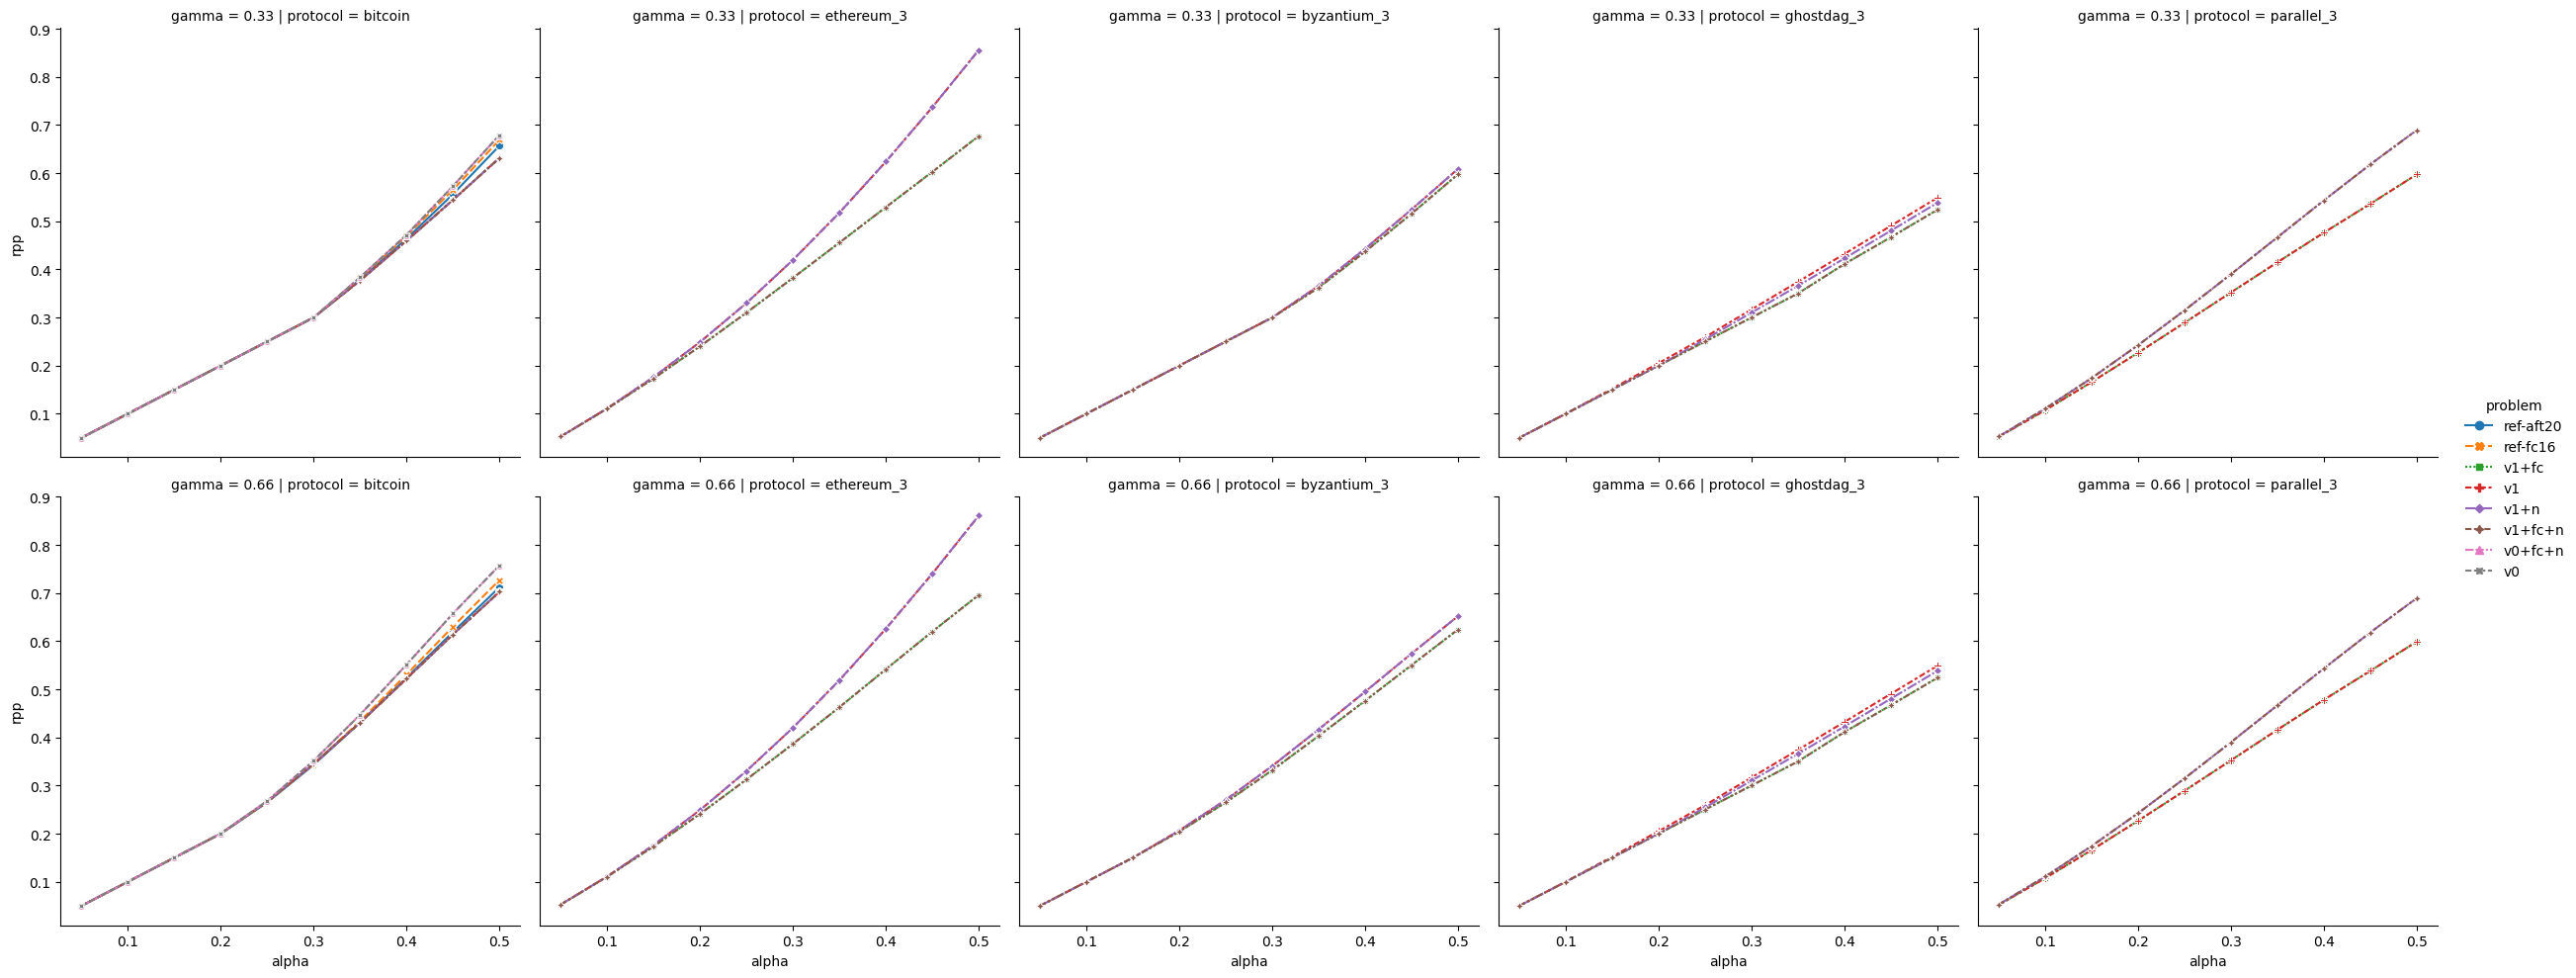

In [7]:
seaborn.relplot(
    data=df,
    kind="line",
    x="alpha",
    y="rpp",
    col="protocol",
    hue="problem",
    style="problem",
    markers=True,
    row="gamma",
)

# Revenue, PTO model, at source-model steady state

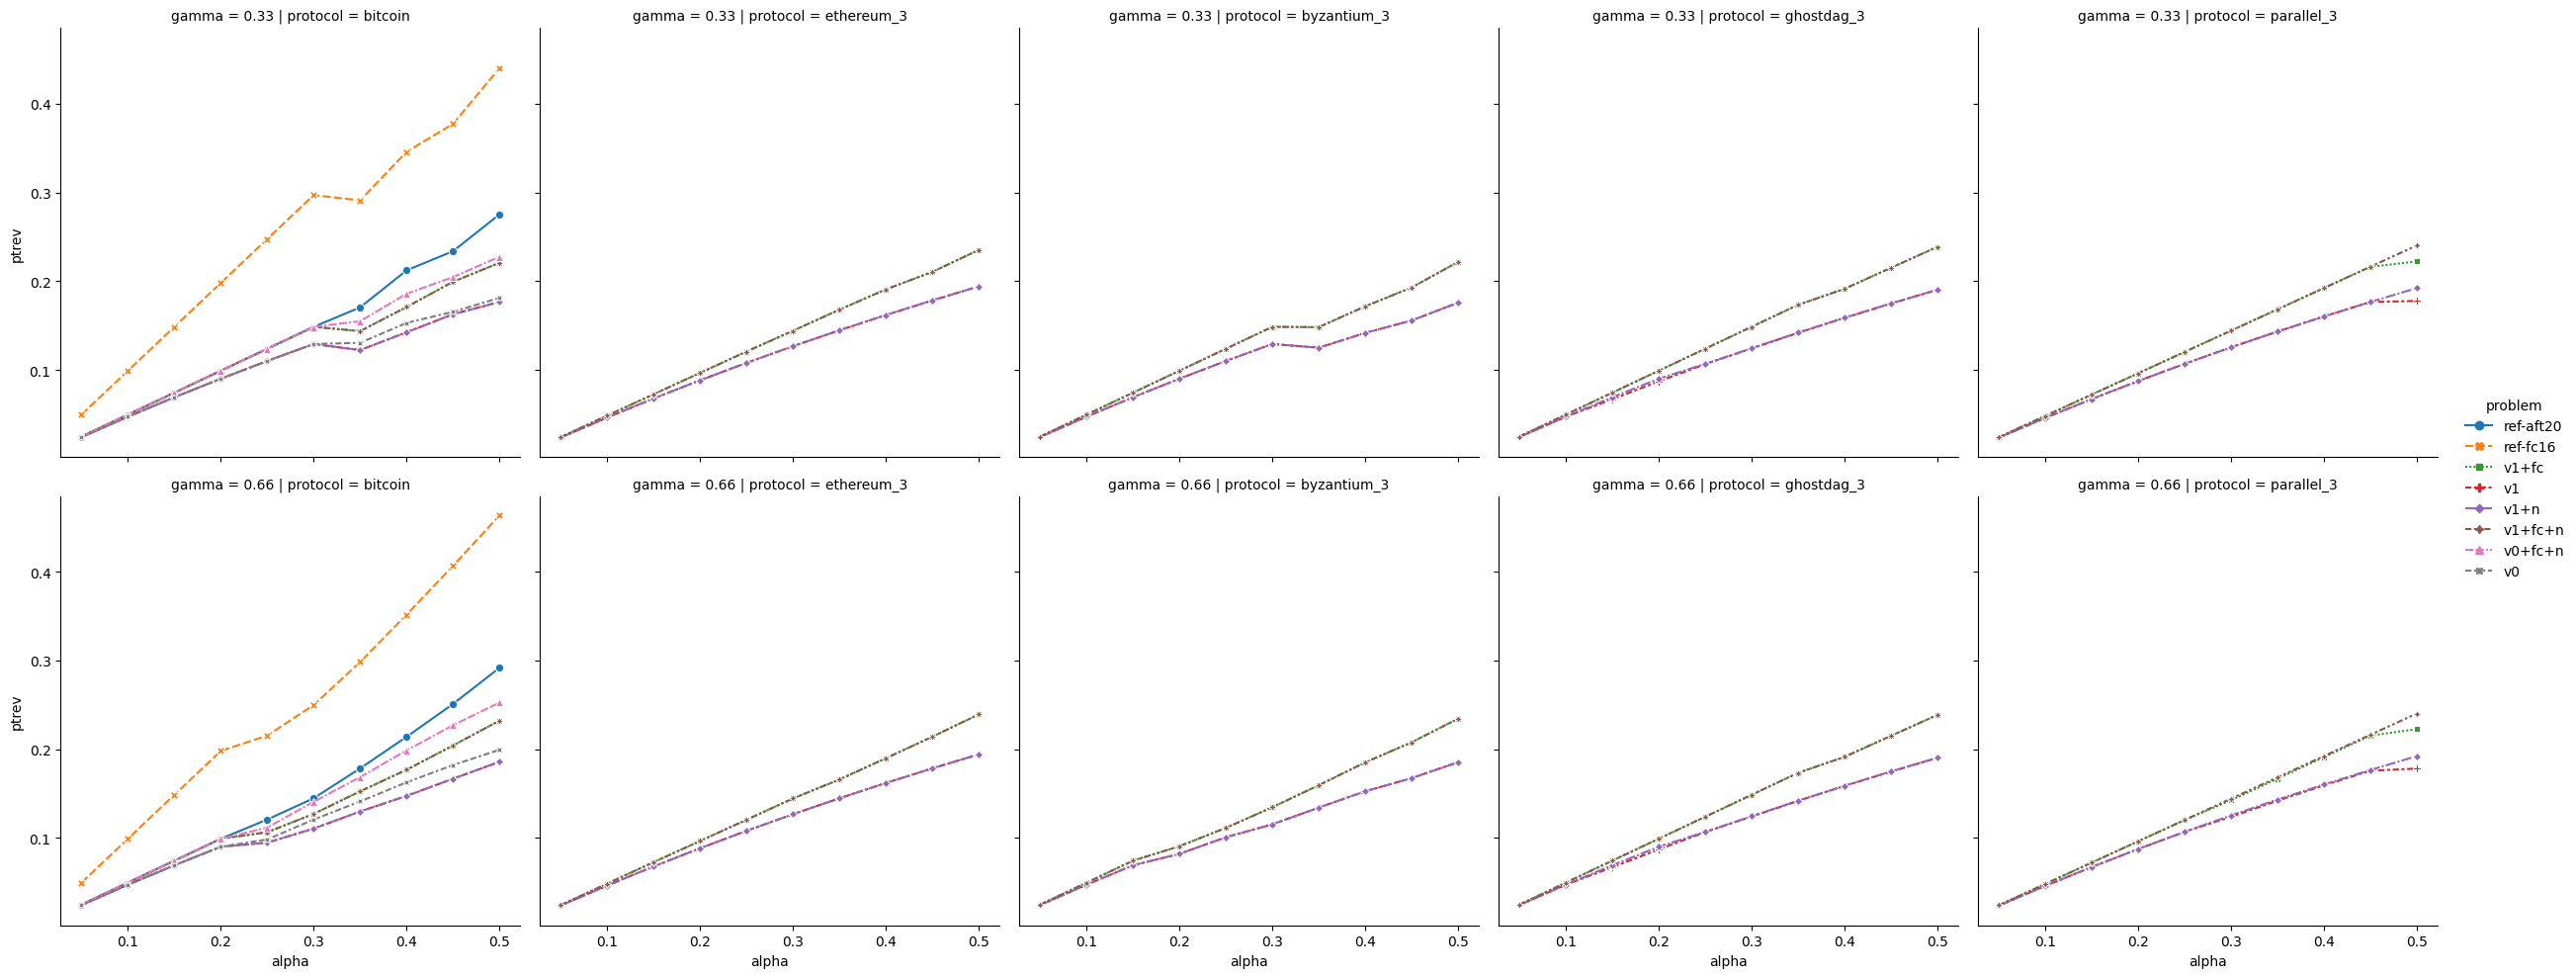

In [8]:
seaborn.relplot(
    data=df,
    kind="line",
    x="alpha",
    y="ptrev",
    col="protocol",
    hue="problem",
    style="problem",
    markers=True,
    row="gamma",
)